**Цель проекта**

Подготовить список гипотез для увеличения выручки.
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 



In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats

**1. Прочитаем файл, изучим и проведем предобработку**

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.options.display.max_colwidth = 1
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Название столбцов имеют прописные буквы, приведем их с корректному виду

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

Посмотрим на общую информацию

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


На первый взгляд все нормально. Выявим пропуски

In [6]:
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

Пропусков нет. Проверим на явные дубликаты

In [7]:
hypothesis.duplicated().sum()

0

Явных дубликатов нет.

**2.Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.**

In [8]:
hypothesis['ICE']= round(hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts'],2)
pd.options.display.max_colwidth = 1
hypothesis.sort_values(by='ICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


На первом месте гипотеза "Запустить акцию, дающую скидку на товар в день рождения". Также наиболее перспективные гипотезы "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'' и  "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

**Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [9]:
hypothesis['RICE']= round(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'],2)
pd.options.display.max_colwidth = 1
hypothesis.sort_values(by='RICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Сейчас в лидерах также гипотезы "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'' и  "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Также в лидерах гиоптеза 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'

Фреймворк RICE учитывает параметр Reach (охват пользователей), и в лидеры вышли гипотезы с наибольшим охватом пользователей.

**3.Проанализируем A/B-тест:**

 Проанализируем данные и проведем предобработку.

In [10]:
orders = pd.read_csv('/datasets/orders.csv')

In [11]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [14]:
orders.duplicated().sum()

0

In [15]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

Пропусков и дубликатов нет.

In [16]:
 visitors = pd.read_csv('/datasets/visitors.csv')

In [17]:
 visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [18]:
 visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [20]:
 visitors.duplicated().sum()

0

In [21]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

Здесь также нет пропусков и дубликатов нет. Приведем названия столбцов и формат даты к корректному виду.

In [22]:
orders.columns = orders.columns.str.replace('Id', '_id') 

orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d') 
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')

In [23]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [24]:
group_a = orders[(orders['group'] == 'A')]['visitor_id']
group_b = orders[(orders['group'] == 'B')]['visitor_id']
print('Количество пользователей:', orders['visitor_id'].count())
print('Количество пользователей, оказавшихся одновременно в двух группах: ', len(list(set(group_a) & set(group_b))))
print('Доля пользователей, оказавшихся одновременно в двух группах,%: ', round(len(list(set(group_a) & set(group_b))) / orders['visitor_id'].count()*100,2))

Количество пользователей: 1197
Количество пользователей, оказавшихся одновременно в двух группах:  58
Доля пользователей, оказавшихся одновременно в двух группах,%:  4.85


58 пользователей оказались одновременно в двух группах (4,85% от общего числа).

Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.  

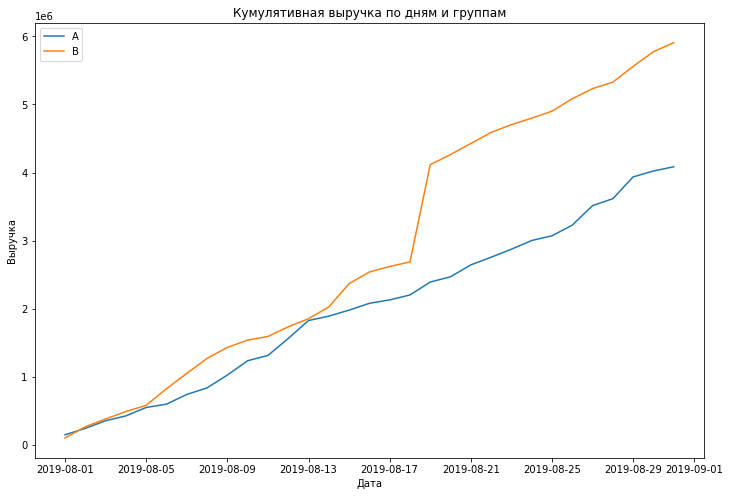

In [25]:
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12,8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по дням и группам')
plt.legend();



Выручка растет на протяжении всего теста в обоих группах.
Выручка в группе В выше практически на протяжении всего периода.
у группы B наблюдается резкий всплеск 18.08 и 19.08, который может быть связан с резким увеличением заказов в этот день, либо о появлении очень дорогих заказов.
после выброса в группе B выручки в обоих группах стабилизируются и растут практически одинаково.

Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

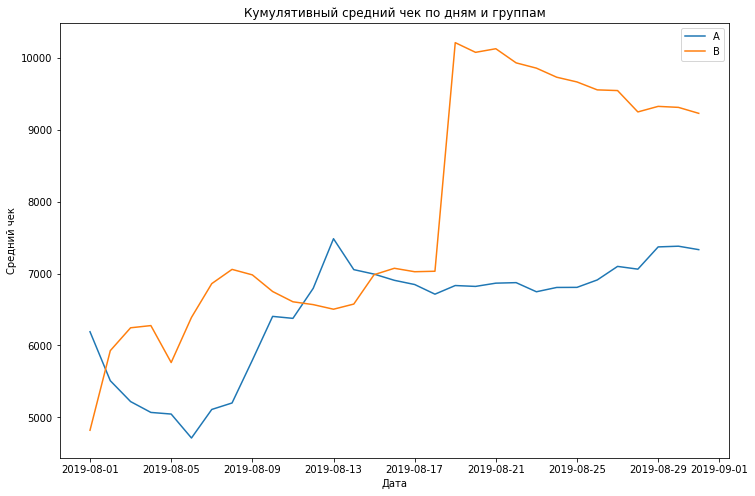

In [26]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по дням и группам')
plt.legend();

В первой половине теста графики ведут себя не стабильно, есть как сильные росты, так и падения, но примерно одинаково.
На графике среднего чека аномальное значение для группы B 18.08 и 19.08  уже более явное(что говорит о крупном заказе).
К концу периода коммулятивный средний чек группы B выше, чем у А.
К концу периода у группы А средний чек растет, а у B снижается.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

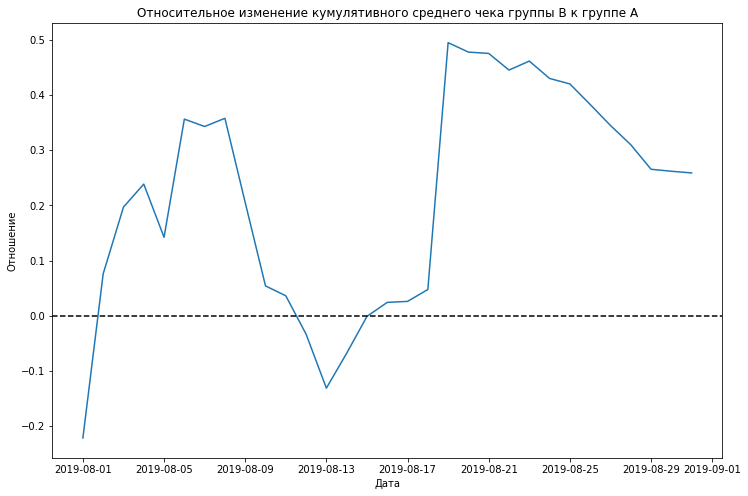

In [27]:

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,8))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A');


В целом в группе В показатели лучше. Мы видим резкие скачки 4,8,9 19,20 августа. Это свидетельствует о крупных заказах и выбросах.

Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

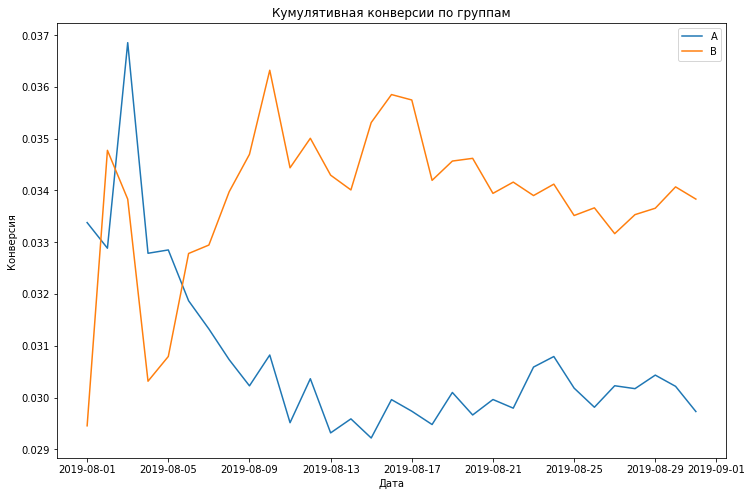

In [28]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12,8))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Конверсия') 
plt.title('Кумулятивная конверсии по группам')
plt.show(); 


По графику мы видим группы колебались первые 4 дня , но с 6 го дня конверсия группы B вырвалась вперёд и стабилизировалась, а конверсия группы A снизилась и также стабилизировалась.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

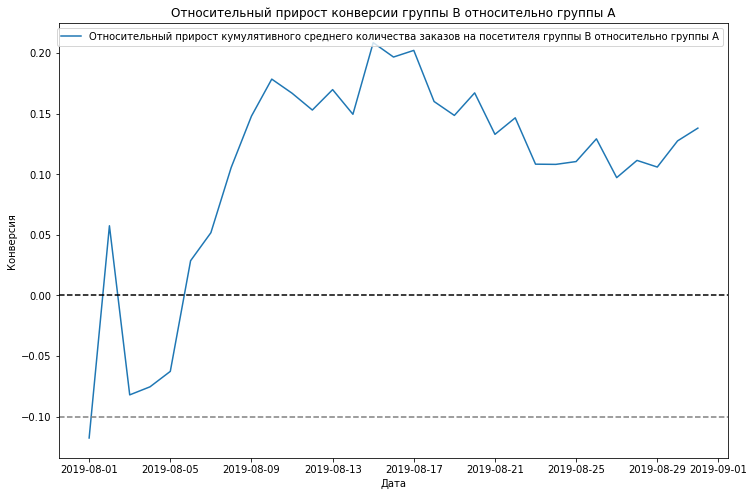

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.ylabel('Конверсия') 
plt.xlabel('Дата') 
plt.title('Относительный прирост конверсии группы B относительно группы A') 
plt.show();

Почти с самого начала группа B лидирует по конверсии: прирост сначала колебался от 15% до 20% к концу периода в районе 10-15%.

Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [30]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

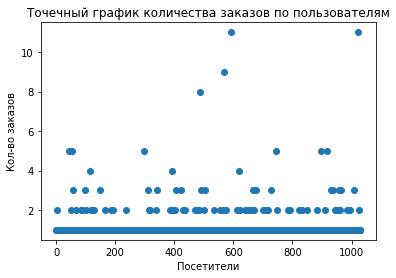

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('Кол-во заказов') 
plt.xlabel('Посетители') 
plt.title('Точечный график количества заказов по пользователям') 
plt.show();

В основном количество заказов 1, но чтобы понять какие заказы считать аномалии посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [32]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

не более 5% пользователей оформляли больше 2 заказов.
И только 1% пользователей заказывали больше 4-х раз.
Выберем более 2-х заказов на одного пользователя за нижнюю границу числа заказов, и отсеим аномальных пользователей.

Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

In [33]:
orders[['visitor_id', 'revenue']].sort_values(by='revenue', ascending=False).head(10) 

,visitor_id,revenue
425,1920142716,1294500
1196,2108080724,202740
858,1316129916,93940
1136,1307669133,92550
744,888512513,86620
682,4266935830,78990
662,4266935830,78990
743,4133034833,67990
1103,1164614297,66350
1099,148427295,65710


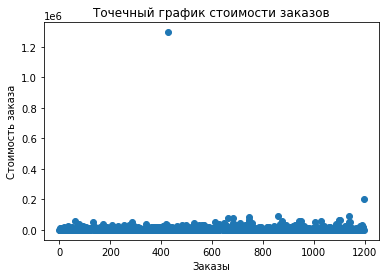

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимости заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Заказы') 
plt.show();

Зададим лимит в 100 000, чтобы подробнее рассмотреть график.

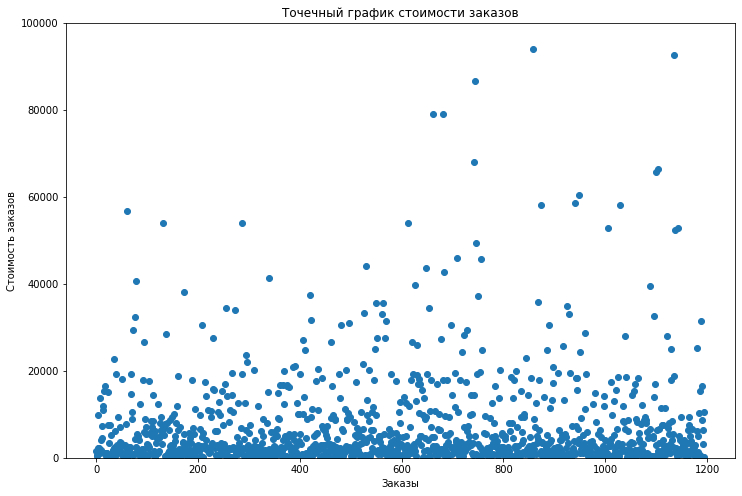

In [35]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,8))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000) 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Заказы') 
plt.title('Точечный график стоимости заказов') 
plt.show();

По графику видно, что основные заказы до 20000, но посчитаем 95-й и 99-й перцентили стоимости заказов, чтобы понять какие заказы считать аномалии. Выберем границу для определения аномальных заказов.

In [36]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

не более 5 % заказов стомостью более 28000 рублей,
не более 1 % заказов стомостью более 58233 рублей.Установим предел по сумме заказа более 28тыс. для отсеивания аномальных пользователей.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
       {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
   orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
   .groupby('date', as_index=False)
   .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
   ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
   'revenueCummulativeA',
]

ordersBDaily = (
   orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
   .groupby('date', as_index=False)
   .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
   .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
   .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
   .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Нулевая гипотеза: Различий в конверсии между группами нет

Альтернативная гипотеза: Различия в конверсиях между группами есть

α=5% критический уровень статистической значимости

In [38]:
result_1 = stats.mannwhitneyu(sampleA, sampleB)[1] 
alpha = 0.05

print(f'Значение p-value : {result_1}')

if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Относительный прирост среднего группы В к конверсии группы А: {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))  

Значение p-value : 0.016792355056752608
Отвергаем нулевую гипотезу
Относительный прирост среднего группы В к конверсии группы А: 0.138


Мы не можем утверждать, что различий между конверсиями нет. Относительный прирост конверсии группы B к конверсии группы A равен 13.8%.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Нулевая гипотеза: Различий в средних чеках между группами нет

Альтернативная гипотеза: Различия в средних чеках между группами есть

α=5%критический уровень статистической значимости

In [39]:
result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]  

print(f'Значение p-value : {result_2}')

if result_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

print('Относительное различие среднего чека между группами:{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение p-value : 0.7292909855432458
Не получилось отвергнуть нулевую гипотезу
Относительное различие среднего чека между группами:0.259


Мы не можем утверждать, что есть различия в среднем чеке. Относительное различие среднего чека между группами по «сырым» данным  25,9% (вероятно сказываются выбросы).

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Узнаем, сколько анамальных пользователей.

In [40]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitor_id'], 
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(orders['revenue'], [95])) ]['visitor_id'],
    ],
    axis=0,
)


usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))     
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64
68


Уберем аномалии.

In [41]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Нулевая гипотеза: Различий в конверсии между группами нет

Альтернативная гипотеза: Различия в конверсиях между группами есть

α=5% критический уровень статистической значимости

In [42]:
result_3 = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] 
print(f'Значение p-value : {result_3}') 
if result_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Отношение конверсии В к А, по очищенным данным:{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


Значение p-value : 0.011208506339388098
Отвергаем нулевую гипотезу
Отношение конверсии В к А, по очищенным данным:0.204


Здесь также не можем утверждать, что различий между конверсиями нет. Относительный прирост конверсии группы B к конверсии группы A увеличился до 20,4%(по сырым данным 13,8%).

Нулевая гипотеза: Различий в средних чеках между группами нет

Альтернативная гипотеза: Различия в средних чеках между группами есть

α=5% критический уровень статистической значимости

In [43]:
result_4 = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
print(f'Значение p-value :{result_4}')  

if result_4 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
    
print('Отношение конверсии В к А, по очищенным данным: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1)
)


Значение p-value :0.7887147766264899
Не получилось отвергнуть нулевую гипотезу
Отношение конверсии В к А, по очищенным данным: -0.017


Здесь мы не можем утверждать, что различия между средними чеками есть. Разница между средним чеком упала с 25,9% в пользу В до 1,7% в пользу А. Скорее всего это связано с выбросами в группе В.

** ВЫВОД**

1. Мы изучили данные и провели предобработку, привели к нужному типу, к корректному виду названия столбцов.

2. Применили фреймворк ICE и RICE для приоритизации гипотез. Отсортировали их по убыванию приоритета.

   - При применении фреймворк ICE на первом месте гипотеза "Запустить акцию, дающую скидку на товар в день рождения". Также    наиболее перспективные гипотезы "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'' и  "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
    
   - При применении фреймворк RICE в лидерах также гипотезы "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'' и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Также в лидерах гиоптеза 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'. 2 гипотезы совпадают, третья разнится.
   Фреймворк RICE учитывает параметр Reach (охват пользователей), и в лидеры вышли гипотезы с наибольшим охватом пользователей.
      
3. Проанализировали A/B-тест:  

  - Построили график кумулятивной выручки  и среднего чека по группам. Сделали выводы и предположения.    
    Выручка растет на протяжении всего теста в обоих группах. Выручка в группе В выше практически на протяжении всего периода, у группы B наблюдается резкий всплеск 18.08 и 19.08, который может быть связан с резким увеличением заказов в этот день, либо о появлении очень дорогих заказов, после выброса в группе B выручки в обоих группах стабилизируются.
    
    В первой половине теста графика среднего чека ведут себя примерно одинаково,не стабильно, есть как сильный рост, так и падения.На графике среднего чека анамальное значение для группы B 18.08 и 19.08(что подтверждает и график выручки)  уже более явное(что говорит о крупном заказе). К концу периода коммулятивный средний чек группы B выше, чем у А,но у группы А средний чек растет, а у B снижается.
    
  - Построили график относительного изменения кумулятивного среднего чека группы B к группе A. Сделали выводы и предположения.   
   В целом в группе В показатели лучше. Мы видим резкие скачки 4,8,9,19,20 августа. Это свидетельствует о крупных заказах и выбросах.
    
  - Построили график кумулятивного среднего количества заказов на посетителя по группам. Сделали выводы и предположения.   
   По графику мы видим группы колебались первые 4 дня , но с 6 го дня конверсия группы B вырвалась вперёд и стабилизировалась, а конверсия группы A снизилась и также стабилизировалась.
    
  - Построили график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.       Сделали выводы и предположения.   
   Почти с самого начала группа B лидирует по конверсии: прирост сначала колебался от 15% до 20% к концу периода в районе 10-15%.
     
   - Построили точечный график количества заказов по пользователям и стоимостей заказов. Сделали выводы и предположения. Посчитали 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов. Выбрали границу для определения        аномальных пользователей.   
   В основном количество заказов 1, но чтобы понять какие заказы считать аномалии посчитали 95-й(2заказа) и 99-й(4 заказа) перцентили количества заказов на пользователя.Выбрали от 3-х заказов на одного пользователя за нижнюю границу числа заказов, и отсеили аномальных пользователей по ней.
   
   - Построили точечный график стоимостей заказов. Сделали выводы и предположения. Посчитали 95-й и 99-й перцентили стоимости заказов. Выбрали границу для определения аномальных заказов.   
   По графику видно, что основные заказы до 20000, но посчитали 95-й(28тыс) и 99-й(58,2тыс.) перцентили стоимости заказов, чтобы понять какие заказы считать аномалии. Установили предел по сумме заказа более 28тыс. для отсеивания аномальных пользователей.
     
   - Посчитайли статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке заказа между          группами по «сырым» и «очищенным» данным. Сделали выводы и предположения.
    
   
**По сырым и очищенным данным нет статистически значимого различия по среднему чеку между группами. 
График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.График различия среднего чека колеблется: он-то и позволил нам найти аномалии. График различий кумулятивного среднего чека говорит нам о преимуществе группы B только из - за выброса.
Исходя из обнаруженных фактов, тест следует остановить, признать его успешным и перейти к проверке следующей гипотезы.**
  